In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
iris=load_iris()

In [ ]:
x=iris.data
y=iris.target

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8,random_state=40)


In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [33]:
knn=KNeighborsClassifier(n_neighbors=5)

In [34]:
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [35]:
y_predict=knn.predict(x_test)

In [36]:
accuracy=accuracy_score(y_test,y_predict)

In [37]:
accuracy

1.0

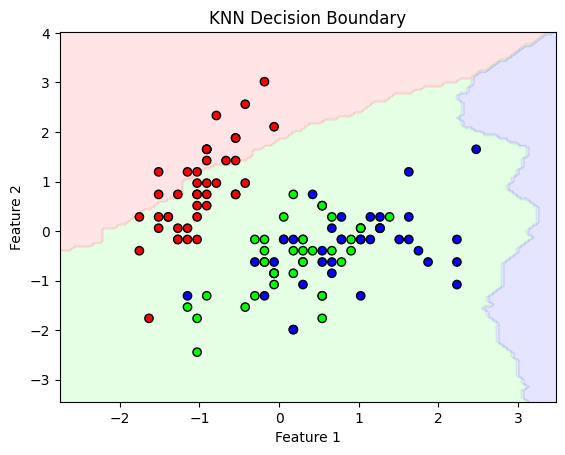

In [39]:
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])  # Padding for extra features
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolor='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundary')
plt.show()